### Treating Outliers

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import regex as re

In [36]:
data=pd.read_csv('./archive (23).zip')

In [37]:
data

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114,14,"1,652",($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147,12,"1,746",($787),-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414,13,"5,444","($3,344)",-159%
...,...,...,...,...,...,...,...,...,...
295,Gunar Cockshoot,New Zealand,Almond Choco,$938,366,12,"4,348","($3,410)",-364%
296,Gunar Cockshoot,Australia,Baker's Choco Chips,"$8,841",303,6,"1,697","$7,144",81%
297,Barr Faughny,UK,Peanut Butter Cubes,"$4,018",126,12,"1,559","$2,459",61%
298,Carla Molina,New Zealand,Raspberry Choco,$714,231,12,"2,710","($1,996)",-280%


In [38]:
data.shape

(300, 9)

In [39]:
data.isnull().sum()

Sales Person     0
Geography        0
Product          0
Amount           0
Units            0
cost per unit    0
Cost             0
Profit           0
profit %         0
dtype: int64

#### Plotting the box plot for checking outliers

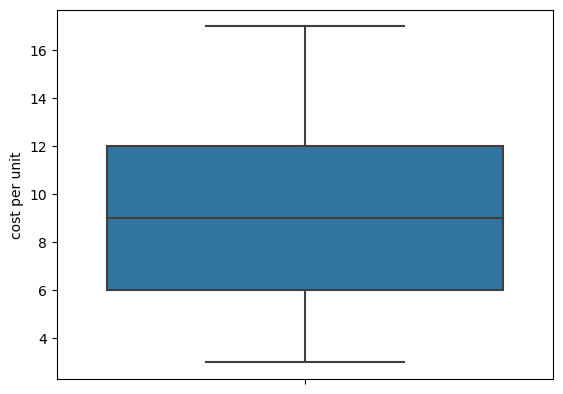

In [40]:
sns.boxplot(data=data, y= 'cost per unit');

#### There is no outlier

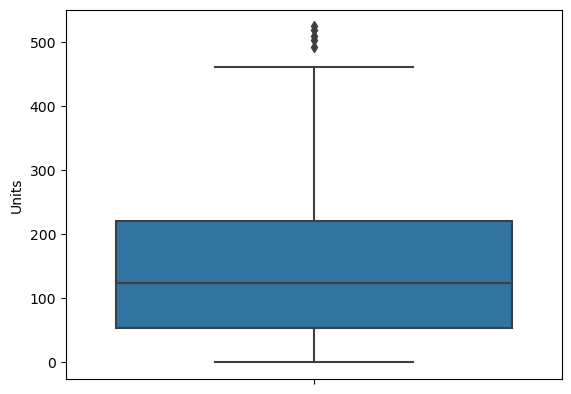

In [41]:
sns.boxplot(data=data, y='Units');

#### There is an outlier
#### Setting the outlier limits

In [42]:
def outlier_limt(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL= Q3+1.5*IQR
    LL= Q1-1.5*IQR
    return UL,LL

In [43]:
UL,LL = outlier_limt(data['Units'])
data['Units']=np.where((data['Units']>UL) | (data['Units']<LL),np.nan,data['Units'])

#### Checking the nan values

In [44]:
data.isnull().sum()

Sales Person     0
Geography        0
Product          0
Amount           0
Units            5
cost per unit    0
Cost             0
Profit           0
profit %         0
dtype: int64

#### We can see that there is 5 outliers present in the Data Frame. We have to drop it.

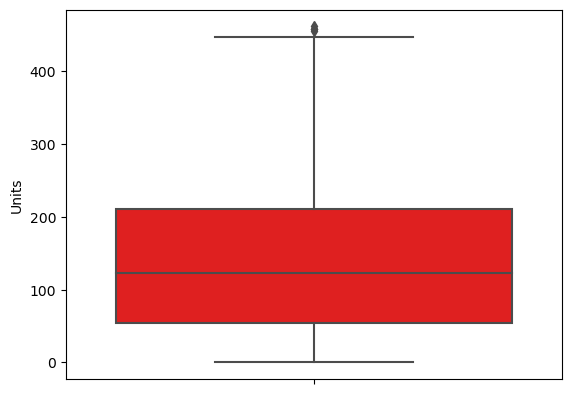

In [45]:
sns.boxplot(data=data, y='Units',color='r');

In [46]:
data.dropna(inplace=True)
data.head()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %
0,Ram Mahesh,New Zealand,70% Dark Bites,"$1,624",114.0,14,"1,652",($28),-2%
1,Brien Boise,USA,Choco Coated Almonds,"$6,706",459.0,9,"3,970","$2,736",41%
2,Husein Augar,USA,Almond Choco,$959,147.0,12,"1,746",($787),-82%
3,Carla Molina,Canada,Drinking Coco,"$9,632",288.0,6,"1,863","$7,769",81%
4,Curtice Advani,UK,White Choc,"$2,100",414.0,13,"5,444","($3,344)",-159%


In [47]:
data.shape

(295, 9)

In [49]:
data['amount']=data.Amount.str.replace('\D','',regex=True)
data['cost']=data.Cost.str.replace('\D','',regex=True)

In [50]:
data.sample()

,Sales Person,Geography,Product,Amount,Units,cost per unit,Cost,Profit,profit %,amount,cost
250,Ches Bonnell,USA,Caramel Stuffed Bars,"$5,194",288.0,10,"2,989","$2,205",42%,5194,2989


In [54]:
data['amount']=data['amount'].astype('int')
data['cost']=data['cost'].astype('int')

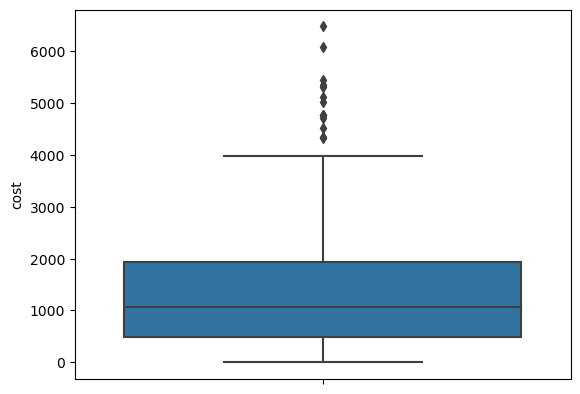

In [55]:
sns.boxplot(data=data , y='cost');

In [56]:
UL,LL = outlier_limt(data['cost'])
data['cost']=np.where((data['cost']>UL)| (data['cost']<LL),np.nan,data['cost'])

In [57]:
data.isnull().sum()

Sales Person      0
Geography         0
Product           0
Amount            0
Units             0
cost per unit     0
Cost              0
Profit            0
profit %          0
amount            0
cost             13
dtype: int64